# Disaster Tweet Analyzer
This notebook aims to analyze tweets related to disasters, classify them, and prepare the dataset for machine learning model development.

## Introduction
The purpose of this project is to build a model that can predict whether a tweet indicates a real disaster or not. We will start by loading the dataset, performing initial data exploration, and then cleaning the data before moving on to preprocessing steps such as tokenization, stopword removal, and lemmatization.

## 1. Import Necessary Libraries

In [11]:
# Import necessary libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## 2. Load the Dataset
Load the dataset containing tweets. The dataset was chosen based on criteria such as the number of tweets and data quality.

In [12]:
# Step 1: Load the dataset
data_file_path = 'C:/SKILLS/Springboard/Jupyter/tweets.csv'
tweets_df = pd.read_csv(data_file_path)
tweets_df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


## 3. Data Exploration
Initial exploration of the dataset to understand its structure and check for any missing values.

In [13]:
# Display the first few rows of the dataset
tweets_df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [14]:
# Check for missing values in the dataset
tweets_df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

## 4. Data Cleaning
Remove any unnecessary characters, punctuation, or special symbols from the text data.

In [15]:
# Cleaning the text data by removing special characters and numbers
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text)
tweets_df.head()

,id,keyword,location,text,target,cleaned_text
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence in bhainsa telangana stones ...
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,telangana section has been imposed in bhainsa...
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership httpst...
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership httpst...
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus your love brings freedom and pardon...


## 5. Data Visualization
Visualize the distribution of disaster and non-disaster tweets to gain insights.

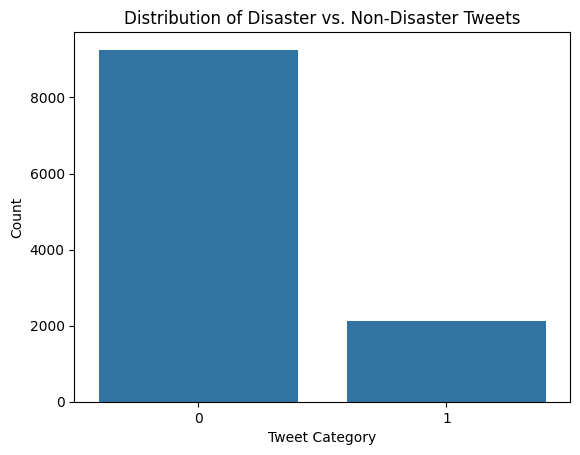

In [16]:
# Plotting the distribution of the target variable
sns.countplot(x='target', data=tweets_df)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Tweet Category')
plt.ylabel('Count')
plt.show()

## 6. Conclusion and Next Steps
The dataset has been loaded and cleaned. Initial visualizations provided insights into the data distribution. In the next steps, we will proceed with tokenization, stopword removal, and lemmatization to fully preprocess the text data.

### Additional Visualizations

C:\Users\HP\AppData\Local\Temp\ipykernel_27688\1940034949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')


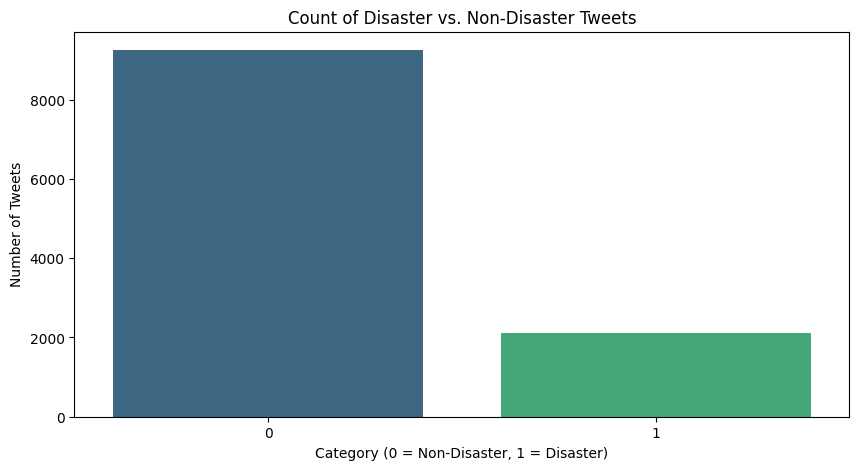

In [17]:
# Plot the number of disaster and non-disaster tweets
disaster_counts = tweets_df['target'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')
plt.title('Count of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Category (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

#### Most Common Keywords in Disaster Tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\HP\AppData\Local\Temp\ipykernel_27688\1577014280.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


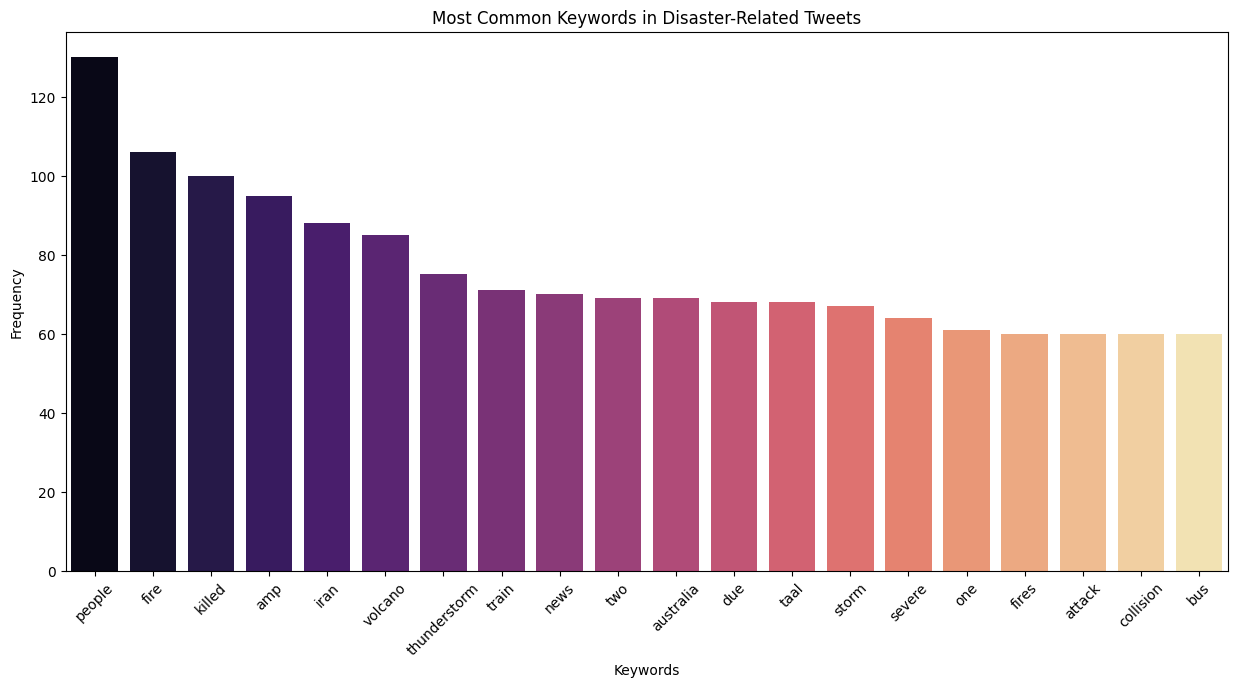

In [18]:
# Finding the most common keywords in disaster-related tweets
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
disaster_tweets = tweets_df[tweets_df['target'] == 1]['cleaned_text']
all_words = ' '.join(disaster_tweets).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plotting the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Most Common Keywords in Disaster-Related Tweets')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Word Clouds for Target vs. Non-Target Tweets

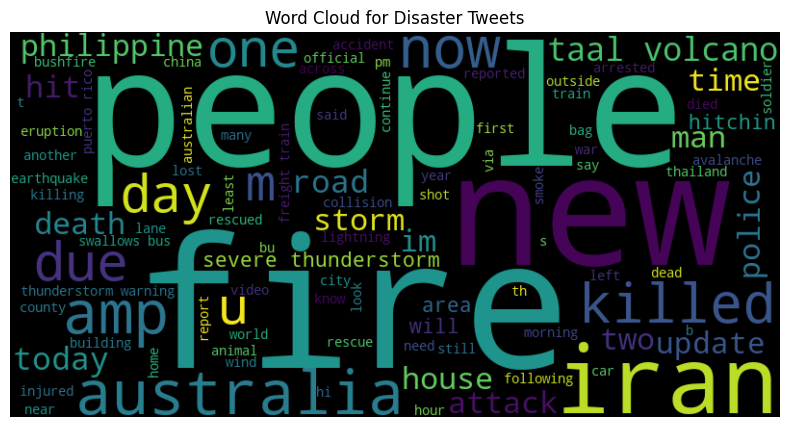

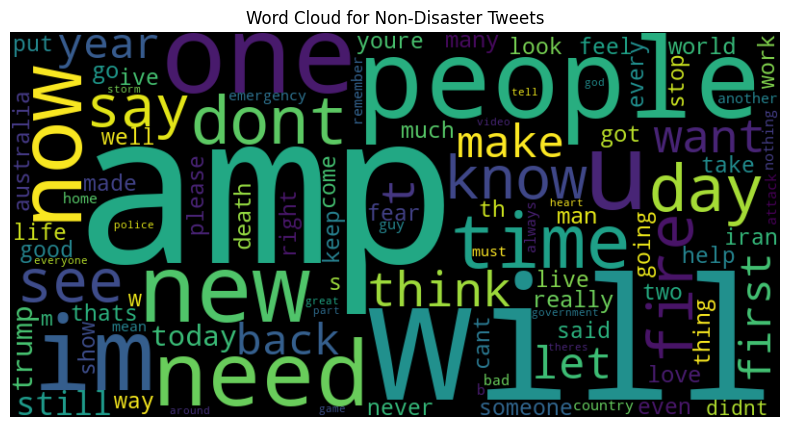

In [19]:
# Generating word clouds for disaster (target) and non-disaster (non-target) tweets
disaster_text = ' '.join(tweets_df[tweets_df['target'] == 1]['cleaned_text'])
non_disaster_text = ' '.join(tweets_df[tweets_df['target'] == 0]['cleaned_text'])

# Word cloud for disaster tweets
disaster_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(disaster_text)
plt.figure(figsize=(10, 5))
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Disaster Tweets')
plt.axis('off')
plt.show()

# Word cloud for non-disaster tweets
non_disaster_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(non_disaster_text)
plt.figure(figsize=(10, 5))
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Disaster Tweets')
plt.axis('off')
plt.show()